In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Assuming your dataset is stored in a CSV file
df = pd.read_csv('kl-house-facility.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

                   location  \
0  Kuala Lumpur  Taman Desa   
1      Kuala Lumpur  Cheras   
2  Kuala Lumpur  Taman Desa   
3      Kuala Lumpur  Sentul   
4  Kuala Lumpur  Mont Kiara   

                                          facilities        Unnamed: 2  
0  Minimart, Gymnasium, Security, Playground, Swi...              , ,   
1  Playground, Parking, Barbeque area, Security, ...  , , Near KTM/LRT  
2       Minimart, Jogging Track, Lift, Swimming Pool               NaN  
3  Parking, Playground, Swimming Pool, Squash Cou...  , Near KTM/LRT,   
4  Parking, Security, Lift, Swimming Pool, Playgr...               NaN  


In [4]:
# Example: Encoding categorical variables
le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

In [5]:
# Example: Extracting the number of facilities as a feature
df['num_facilities'] = df['facilities'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)


In [9]:
df['num_facilities'].fillna(df['num_facilities'].median(), inplace=True)


In [12]:
df.dropna(inplace=True)


In [14]:
df = df.dropna(axis=1)


In [16]:
X = df[['location_encoded', 'num_facilities']]  # Features
y = df['facilities']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = model.predict(X_test)

# Example: Display accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.13614649681528662
Classification Report:
                                                                                                                                                                          precision    recall  f1-score   support

Barbeque area, Club house, Security, Tennis Court, Playground, Gymnasium, Squash Court, Sauna, Parking, Swimming Pool, Jogging Track, Lift, Minimart, Multipurpose hall       0.00      0.00      0.00         1
                                   Barbeque area, Gymnasium, Club house, Minimart, Parking, Security, Playground, Swimming Pool, Lift, Jogging Track, Multipurpose hall       0.00      0.00      0.00         1
                                               Barbeque area, Gymnasium, Multipurpose hall, Swimming Pool, Tennis Court, Playground, Parking, Security, Sauna, Minimart       0.00      0.00      0.00         1
                                                                          Barbeque area, Gymnasium, Sauna, Se

c:\Users\ravio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ravio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ravio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ravio\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [18]:
# Example: Fine-tuning hyperparameters
# (Note: This is a simplified example; you may need to perform a more thorough hyperparameter search)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [19]:
df['num_facilities'] = df['facilities'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

In [20]:
location_facilities = df.groupby('location')['num_facilities'].mean().sort_values(ascending=False)


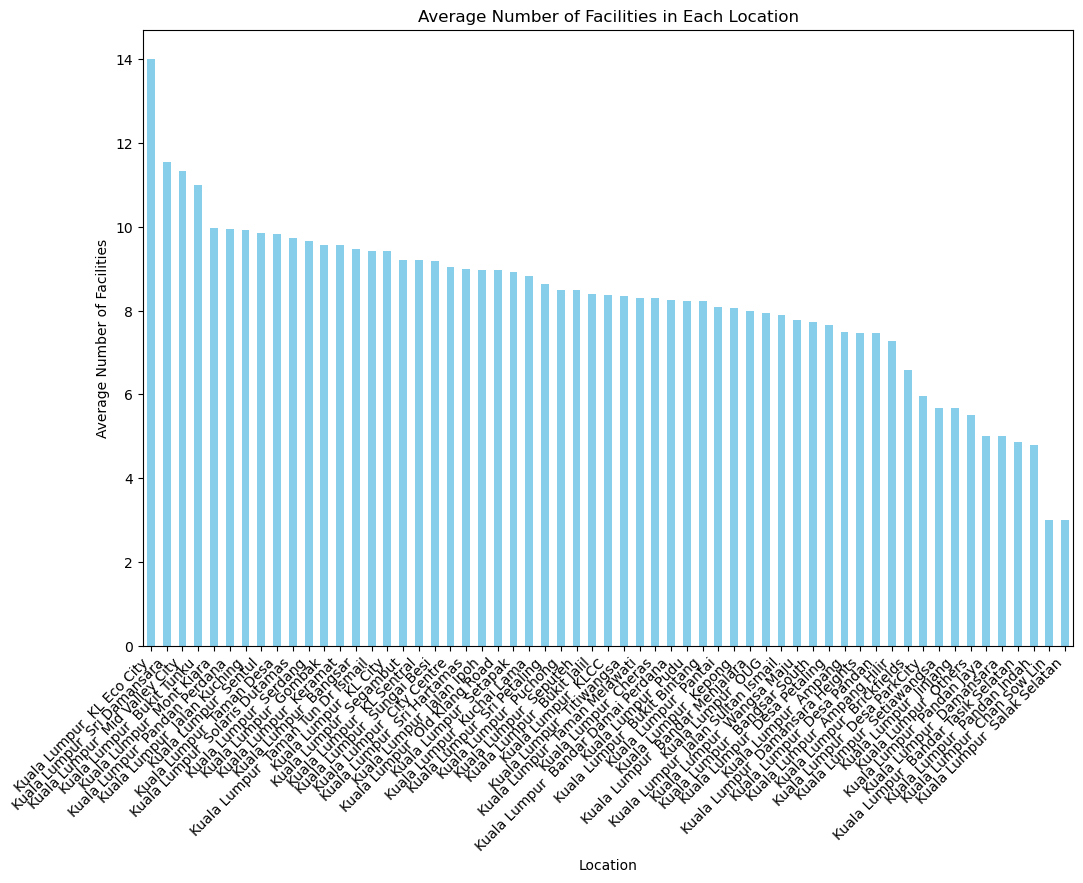

In [21]:
# Creating a bar chart
plt.figure(figsize=(12, 8))
location_facilities.plot(kind='bar', color='skyblue')
plt.title('Average Number of Facilities in Each Location')
plt.xlabel('Location')
plt.ylabel('Average Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.show()